# Trabajo práctico integrador

**Nombre**:

## Primera Parte (Clase 1 y 2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Primer ejercicio

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [2]:
def normas(matriz, p):
    if p == 0:
        norma_p = np.sum(matriz != 0, axis=1)
    elif p == np.inf:
        norma_p = np.max(np.abs(matriz), axis=1)
    else:
        norma_p = np.power(np.power(np.abs(matriz), p).sum(axis=1), 1/p)
    
    return norma_p

#Ejemplo con matriz A
A = np.matrix('-2 -4 2; -2 1 2; 4 2 5')
#normas(A,np.0)
norm_0=normas(A,0)
norm_1=normas(A,1)
norm_2=normas(A,2)
norm_inf=normas(A,np.inf)

print("Normas l0:\n", norm_0)
print("Normas l1:\n", norm_1)
print("Normas l2:\n", norm_2)
print("Normas l-inf:\n", norm_inf)

Normas l0:
 [[3]
 [3]
 [3]]
Normas l1:
 [[ 8.]
 [ 5.]
 [11.]]
Normas l2:
 [[4.89897949]
 [3.        ]
 [6.70820393]]
Normas l-inf:
 [[4]
 [2]
 [5]]


### Segundo Ejercicio

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [3]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

TP = np.sum(np.logical_and(truth == 1, prediction == 1))
TN = np.sum(np.logical_and(truth == 0, prediction == 0))
FP = np.sum(np.logical_and(truth == 0, prediction == 1))
FN = np.sum(np.logical_and(truth == 1, prediction == 0))

precision = TP / (TP + FP)
recall = TP / (TP + FN)
accuracy = (TP + TN) / (TP + TN + FP + FN)

print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.5
Recall: 0.5
Accuracy: 0.4


### Tercer y Cuarto Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [31]:
# Ejercicio 3



In [ ]:
# 1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?

# Estandarización de características
scaler = StandardScaler()
digits_std = scaler.fit_transform(digits.data)

# Aplicación de PCA
pca = PCA()
pca.fit(digits_std)
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_sum >= 0.8) + 1
print("Número de componentes necesarias para explicar el 80% de la varianza:", n_components)

# 2. Gráficar la variación acumulada
plt.plot(cumulative_sum)
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.show()

In [ ]:
# 3. Utilizando KMeans Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de k=6 y k=2.
# 4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.

pca = PCA(n_components=21)
digits_transformed = pca.fit_transform(digits.data)

k_values = [6, 2]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(digits_transformed)
    plt.scatter(digits_transformed[:, 0], digits_transformed[:, 1], c=labels)
    plt.title(f"Clusters con k={k}")
    plt.show()

La utilización de PCA (Análisis de Componentes Principales) en conjunto con el algoritmo de clustering K-means puede proporcionar varias ventajas en la exploración y análisis de datos. A continuación se detallan algunas de ellas:

Reducción de dimensionalidad: PCA se utiliza para reducir la dimensionalidad del conjunto de datos, conservando la mayor cantidad posible de información. Esto permite que K-means sea más efectivo en la agrupación de los datos, ya que el algoritmo se basa en la distancia entre los puntos para determinar los clusters, y la presencia de muchas dimensiones puede dificultar la identificación de patrones claros.

Mayor eficiencia computacional: Al reducir la dimensionalidad del conjunto de datos, también se reduce la cantidad de cálculos necesarios para ejecutar el algoritmo de clustering. Esto se traduce en una mayor eficiencia computacional, lo que puede ser especialmente importante en conjuntos de datos grandes.

Mejora de la interpretación: PCA también puede mejorar la interpretación de los resultados de clustering. Al reducir la dimensionalidad del conjunto de datos, se puede visualizar fácilmente la distribución de los datos en un espacio de dos o tres dimensiones. Esto permite una mejor comprensión de la estructura de los clusters y de cómo se relacionan entre sí.

Optimización del número de clusters: PCA puede ayudar a determinar el número óptimo de clusters para el conjunto de datos. Al analizar la varianza explicada por cada componente principal, se puede identificar la cantidad de información que se puede retener al reducir la dimensionalidad. Esto puede proporcionar una guía para la selección del número óptimo de clusters para el algoritmo de K-means.

En resumen, la combinación de PCA y K-means puede proporcionar una forma eficaz de explorar y analizar conjuntos de datos complejos. La reducción de la dimensionalidad, la mayor eficiencia computacional y la mejora de la interpretación pueden ser beneficiosas para la identificación de patrones y estructuras en los datos, y para la toma de decisiones informadas basadas en los resultados de clustering.

In [6]:
# Ejercicio 4

from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


Número de componentes necesarias para explicar el 80% de la varianza: 21


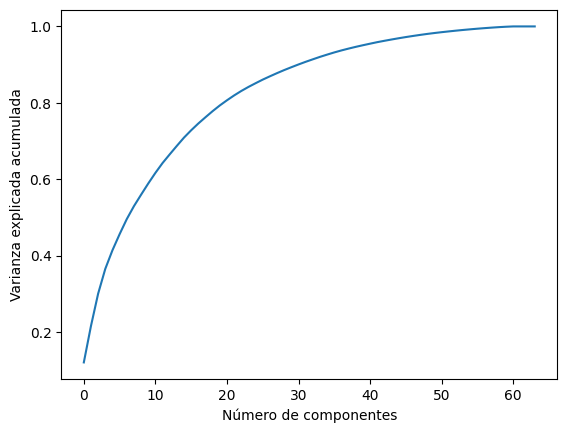

In [38]:
# 1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?

# Estandarización de características
scaler = StandardScaler()
digits_std = scaler.fit_transform(digits.data)

# Aplicación de PCA
pca = PCA()
pca.fit(digits_std)
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_sum >= 0.8) + 1
print("Número de componentes necesarias para explicar el 80% de la varianza:", n_components)

# 2. Gráficar la variación acumulada
plt.plot(cumulative_sum)
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.show()

c:\Users\karen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


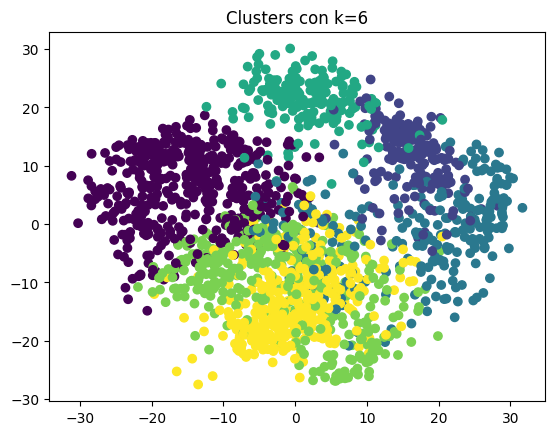

c:\Users\karen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


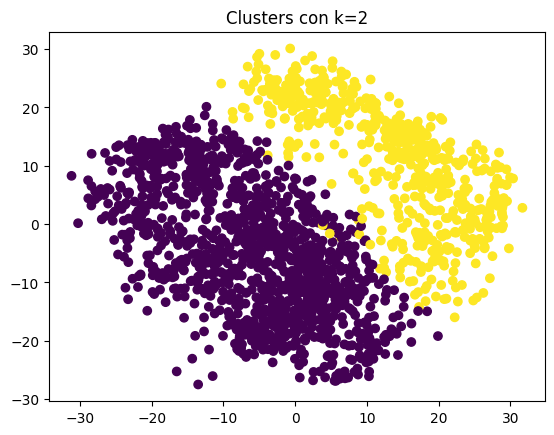

In [42]:
# 3. Utilizando KMeans Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de k=6 y k=2.
# 4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.

pca = PCA(n_components=21)
digits_transformed = pca.fit_transform(digits.data)

k_values = [6, 2]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(digits_transformed)
    plt.scatter(digits_transformed[:, 0], digits_transformed[:, 1], c=labels)
    plt.title(f"Clusters con k={k}")
    plt.show()

5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

La ganancia de usar PCA en conjunto con KMeans es que se reducen la cantidad de dimensiones de los datos, permitiendo que el algoritmo de KMeans trabaje con una cantidad menor de variables, lo que puede llevar a una mayor eficiencia y mejores resultados. Además, al reducir la cantidad de variables, se reduce la complejidad del modelo y se evita el problema de la dimensionalidad. Sin embargo, esto puede tener un costo en la interpretación de los resultados, ya que las variables originales se pierden en el proceso de reducción de dimensionalidad.

## Segunda Parte (Clase 3 y 4)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

Vamos a crear un dataset sintetico utilizando las librerias de [Sklearn Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html), en particular nos interesa crear un problema de regresion
lineal al que podemos variarle sus parametros

In [5]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [6]:
df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


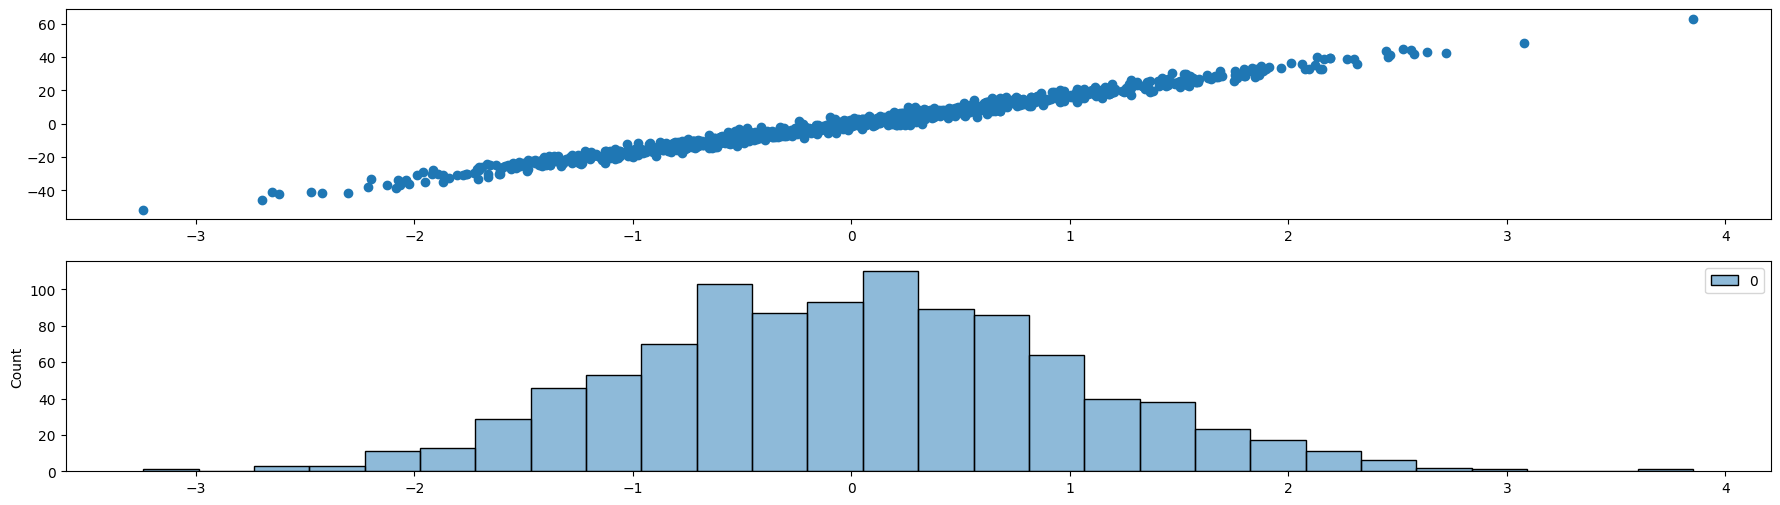

In [7]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

### Funciones auxiliares para generar datos anómalos

In [8]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [9]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)

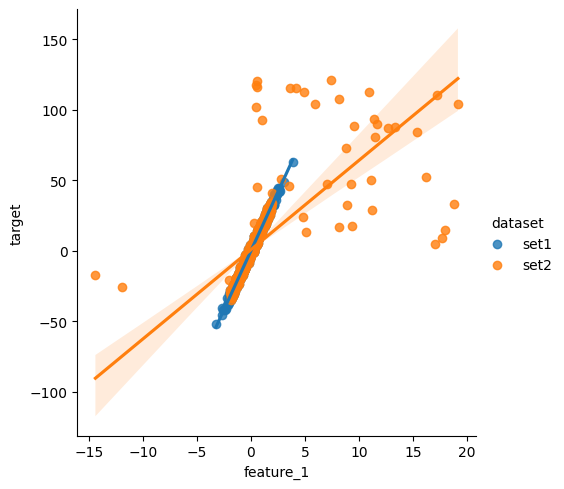

In [10]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [209]:
def split(df: pd.DataFrame, train_size: float):
    # n = número total de filas en el dataframe
    n = len(df)

    # Crear una matriz de índices de fila y mezclarla aleatoriamente
    idx = np.random.permutation(n)

    # Calcular el número de filas para cada conjunto
    n_train = int(np.ceil(train_size * n))
    n_val = int(np.ceil(0.2 * n))
    n_test = n - n_train - n_val

    # Seleccionar las filas correspondientes a cada conjunto
    train_idx = idx[:n_train]
    val_idx = idx[n_train:n_train + n_val]
    test_idx = idx[n_train + n_val:]

    # Este paso funciona si target es la ultima columna en el dataset
    X_train = df.iloc[train_idx, :-1]
    Y_train = df.iloc[train_idx, -1]
    X_val = df.iloc[val_idx, :-1] 
    Y_val = df.iloc[val_idx, -1]
    X_test = df.iloc[test_idx, :-1]
    Y_test = df.iloc[test_idx, -1]

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

# Crear un dataset de ejemplo
df2 = pd.DataFrame({
    "target": [0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
    "feature1": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "feature2": [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]
})

X_train, X_val, X_test, Y_train, Y_val, Y_test = split(df2, train_size=0.7)

# Imprimir el tamaño de cada conjunto
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de validación:", len(X_val))
print("Tamaño del conjunto de prueba:", len(X_test))


Tamaño del conjunto de entrenamiento: 7
Tamaño del conjunto de validación: 2
Tamaño del conjunto de prueba: 1


### Sexto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generar datasets:
    - Uno normal con poco `noise` y pocos outliers
    - Uno con mucho `noise` y pocos outliers
    - Uno con poco `noise` y muchos outliers
    - Uno con mucho `noise` y muchos outliers
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Comparar y analizar resultados.

In [234]:
# Paso 1: Generar datasets

# Datos con poco noise y pocos outliers
X1, y1 = make_regression(n_samples=1000, n_features=10, noise=20, n_informative=5, random_state=42)
df1 = pd.DataFrame(X1, columns=[f'feature_{i+1}' for i in range(X1.shape[1])])
df1['target'] = y1

# Datos con mucho noise y pocos outliers
X2, y2 = make_regression(n_samples=1000, n_features=10, noise=100, n_informative=5, random_state=42)
df2 = pd.DataFrame(X2, columns=[f'feature_{i+1}' for i in range(X2.shape[1])])
df2['target'] = y2

# Datos con poco noise y muchos outliers
X3, y3 = make_regression(n_samples=1000, n_features=10, noise=20, n_informative=5, random_state=42)
df3 = pd.DataFrame(X3, columns=[f'feature_{i+1}' for i in range(X3.shape[1])])
df3['target'] = y3
df3 = generate_outliers(df3, ['feature_1'], percentage=0.25, extreme_outlier=False, two_tailed=True)

# Datos con mucho noise y muchos outliers
X4, y4 = make_regression(n_samples=1000, n_features=10, noise=100, n_informative=5, random_state=42)
df4 = pd.DataFrame(X4, columns=[f'feature_{i+1}' for i in range(X4.shape[1])])
df4['target'] = y4
df4 = generate_outliers(df4, ['feature_1'], percentage=0.25, extreme_outlier=False, two_tailed=True)

df4.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.123,-1.253,0.370,0.102,0.093,-0.589,0.306,-1.458,1.630,1.243,-44.755
1,-0.217,0.215,-0.029,-1.701,0.264,0.315,0.374,-0.293,0.502,0.064,-16.219
2,0.389,1.655,-0.756,-1.162,-0.301,1.049,-0.283,0.251,-0.194,-1.209,-9.542
3,0.219,-0.252,-1.096,-0.807,-0.435,2.768,1.677,-0.475,-0.836,-1.315,94.836
4,0.716,0.383,-0.687,-1.236,0.731,1.624,1.254,2.394,2.185,0.538,-161.503


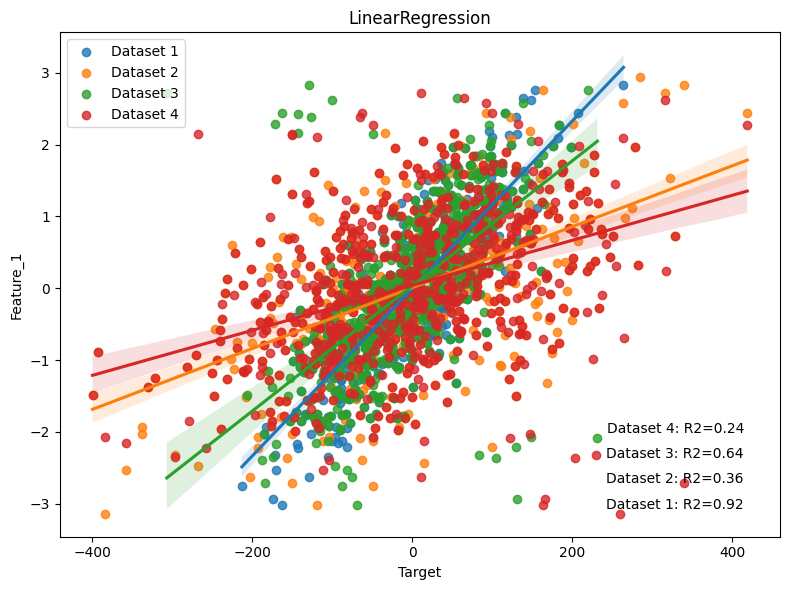

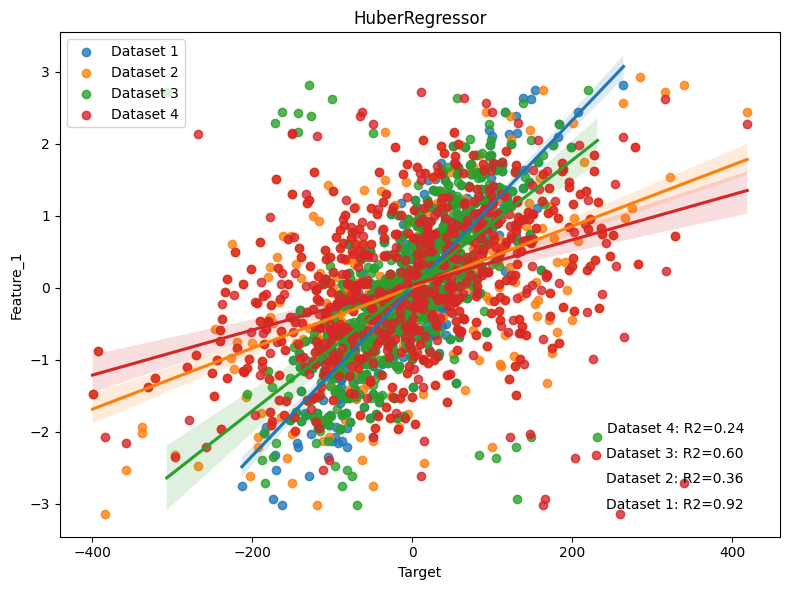

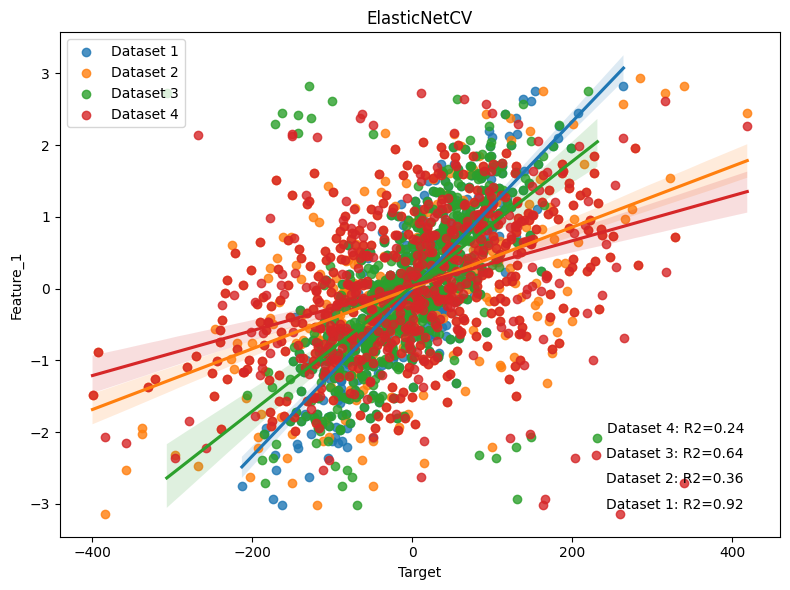

In [238]:
# Pasos 2 y 3

from sklearn.linear_model import LinearRegression, HuberRegressor, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

models = [LinearRegression(), HuberRegressor(), ElasticNetCV()]

# Definir listas con los nombres de los datasets y los modelos usados en este ejercicio 
dataset_names = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']
model_names = ['LinearRegression', 'HuberRegressor', 'ElasticNetCV']

# Separar los datos con la funcion del ejercicio 5. Loopeando esto primero me aseguro que cada modelo a comparar use el mismo split
split_data = []
for df in [df1, df2, df3, df4]:
    split_data.append(split(df, train_size=0.7))

# Creo listas para almacenar las métricas de error
mse_train_list = []
mse_val_list = []
r2_list = []

# Creo diccionario para almacenar las métricas de error
error_metrics = {'Dataset': [], 'Model': [], 'MSE_IS': [], 'MSE_OOS': [], 'R2': []}

# Loopear cada modelo
for j, model in enumerate(models):
    model_name = model_names[j]
    
    # Crear figura
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Loopear cada dataset
    for i, (X_train, X_val, X_test, y_train, y_val, y_test) in enumerate(split_data):
        # Entrenar los modelos y calcular R2 y MSE in-sample y out-of-sample
        model.fit(X_train, y_train)
        y_pred_is = model.predict(X_train)
        y_pred_oos = model.predict(X_val)
        mse_train = mean_squared_error(y_train, y_pred_is)
        mse_val = mean_squared_error(y_val, y_pred_oos)
        r2 = r2_score(y_train, y_pred_is)

        # Agrego las métricas de error a las listas 
        mse_train_list.append(mse_train)
        mse_val_list.append(mse_val)
        r2_list.append(r2)

        error_metrics['Dataset'].append(dataset_names[i])
        error_metrics['Model'].append(model_name)
        error_metrics['MSE_IS'].append(mse_train)
        error_metrics['MSE_OOS'].append(mse_val)
        error_metrics['R2'].append(r2)

        # Gráfico target vs feature_1 para el dataset de cada iteración
        sns.regplot(x=y_train, y=X_train.iloc[:, 0], ax=ax, label=dataset_names[i])
        ax.set_title(f'{model_name}')
        ax.set_xlabel('Target')
        ax.set_ylabel('Feature_1')
        ax.text(0.95, 0.05+0.05*i, f'{dataset_names[i]}: R2={r2:.2f}', 
                transform=ax.transAxes, ha='right', va='bottom')
        ax.legend(loc='upper left')
        
    # Imprimir y guardar los gráficos
    plt.tight_layout()
    plt.savefig(f'{model_name}_results.png')
    plt.show()

In [239]:
# Resumen de las metricas de error
df_metrics = pd.DataFrame(error_metrics)
df_metrics = df_metrics.round(3)
df_metrics.set_index('Dataset', inplace=True)
print(df_metrics)

                      Model    MSE_IS   MSE_OOS    R2
Dataset                                              
Dataset 1  LinearRegression   388.013   383.909 0.922
Dataset 2  LinearRegression  9794.775  9469.825 0.365
Dataset 3  LinearRegression  1934.883  2484.565 0.640
Dataset 4  LinearRegression 11556.815 11159.432 0.244
Dataset 1    HuberRegressor   389.700   384.107 0.922
Dataset 2    HuberRegressor  9815.429  9532.858 0.363
Dataset 3    HuberRegressor  2128.648  2706.174 0.604
Dataset 4    HuberRegressor 11653.416 11396.993 0.237
Dataset 1      ElasticNetCV   403.094   421.214 0.919
Dataset 2      ElasticNetCV  9814.926  9445.482 0.363
Dataset 3      ElasticNetCV  1941.812  2475.043 0.639
Dataset 4      ElasticNetCV 11589.155 11118.884 0.242


## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`